In [3]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [4]:
y, sr = librosa.load('C:/Data/sound/flower.wav', duration=120)
print(y)
print(sr)

[0.         0.         0.         ... 0.17967217 0.2139444  0.08612207]
22050


In [5]:
S_full, phase = librosa.magphase(librosa.stft(y))
print(S_full)
print(phase)

[[6.9515869e-09 1.6907482e-01 1.4603391e+00 ... 2.8377169e-01
  6.4299114e-02 2.4530978e+00]
 [6.9975270e-09 1.6913995e-01 1.5084521e+00 ... 1.2110207e-01
  1.9176692e-01 2.5104649e+00]
 [7.1303208e-09 1.6930079e-01 1.7499169e+00 ... 5.3242999e-01
  5.9480339e-01 3.2091389e+00]
 ...
 [7.7682953e-09 1.1590372e-06 5.9344399e-07 ... 1.9944177e-06
  6.7619709e-05 5.1576693e-02]
 [7.7580697e-09 1.1333443e-06 7.5434272e-08 ... 1.2620436e-05
  7.1347225e-05 5.1529735e-02]
 [7.7541449e-09 1.0003675e-06 1.6753603e-07 ... 7.9723559e-06
  7.3007068e-05 5.1520038e-02]]
[[ 1.        +0.j         -1.        +0.j         -1.        +0.j
  ... -1.        +0.j         -1.        +0.j
  -1.        +0.j        ]
 [ 0.8313799 +0.5557045j  -0.8758743 -0.48253933j  0.62560624-0.78013897j
  ...  0.446735  +0.8946663j   0.91439825+0.40481582j
  -0.01625312-0.9998679j ]
 [ 0.38672936+0.9221933j  -0.5350665 -0.84480995j  0.22306457+0.9748037j
  ...  0.07312158-0.997323j   -0.9494092 +0.31404182j
   0.98596394+0

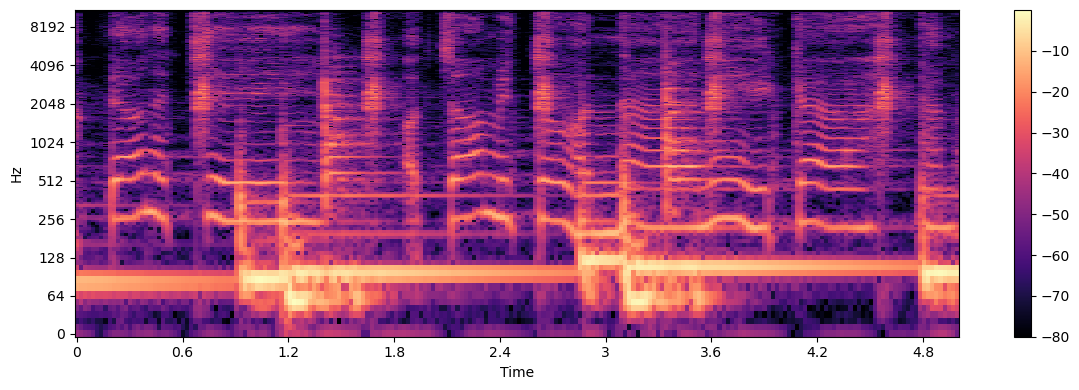

In [6]:
idx = slice(*librosa.time_to_frames([30, 35], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [7]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

S_filter = np.minimum(S_full, S_filter)

margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)


S_foreground = mask_v * S_full
S_background = mask_i * S_full

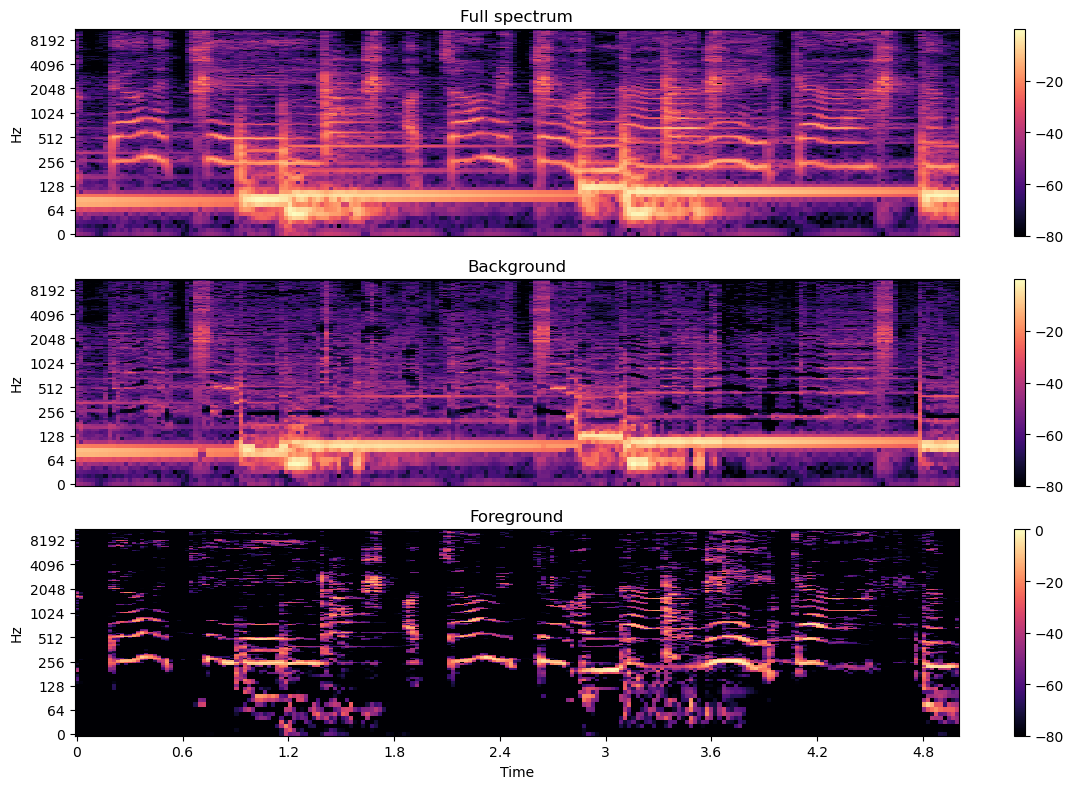

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()